## Exploratory Analysis

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/cleaned_solar_irradiation.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2019-12-30,12,2019-12-30,10.725,14.4125,72.25,1014.2125,127.0,1.4375,572.125,82.875,305.125
1,2019-12-31,12,2019-12-31,12.570,14.8700,64.80,1014.7800,163.6,1.6300,487.800,85.500,259.900
2,2020-01-01,1,2020-01-01,13.060,24.8000,78.30,1014.7700,256.4,2.7100,146.500,135.300,185.500
3,2020-01-02,1,2020-01-02,12.490,13.8400,72.40,1014.3900,324.7,2.6300,461.000,80.900,261.400
4,2020-01-03,1,2020-01-03,12.400,9.6800,69.90,1016.6500,97.9,2.3900,537.700,76.900,274.400


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,6.527248,14.461165,15.155111,67.815733,1011.372891,219.148980,3.593567,439.371710,131.847853,388.333883
std,3.462714,2.869209,5.728032,11.358769,4.479778,62.467324,1.364294,214.006048,56.578503,126.329198
min,1.000000,7.120000,4.225000,27.166667,999.433333,18.300000,0.850000,0.000000,56.500000,63.666667
25%,4.000000,12.221250,11.026923,61.800000,1008.101250,188.340909,2.648377,281.905769,86.104167,284.614011
50%,7.000000,14.577381,13.975000,70.641667,1011.027922,241.345238,3.434524,486.325175,113.366667,394.702381
75%,10.000000,16.212500,18.952857,76.191667,1014.368571,259.000000,4.265385,617.245192,164.068182,501.183333
max,12.000000,24.735714,39.571429,90.200000,1027.630000,330.583333,11.666667,788.153846,313.733333,604.500000


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       734 non-null    object 
 1   MonthPE          734 non-null    int64  
 2   Date             734 non-null    object 
 3   Daily_Temp       734 non-null    float64
 4   Daily_Precip     734 non-null    float64
 5   Daily_Humidity   734 non-null    float64
 6   Daily_Pressure   734 non-null    float64
 7   Daily_WindDir    734 non-null    float64
 8   Daily_WindSpeed  734 non-null    float64
 9   Daily_DNI        734 non-null    float64
 10  Daily_DHI        734 non-null    float64
 11  Daily_radiation  734 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 68.9+ KB


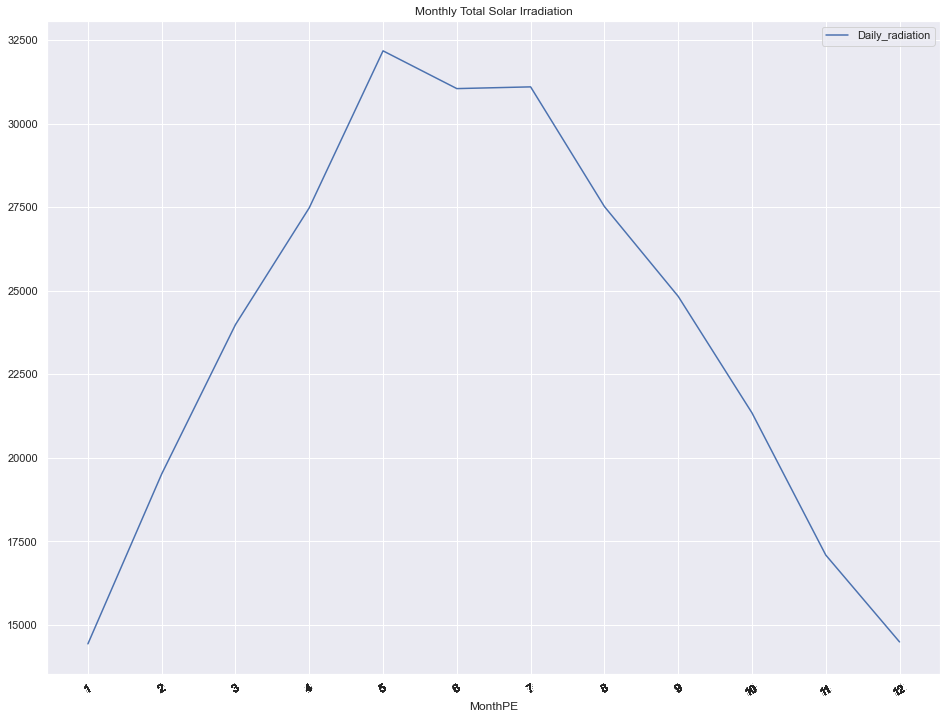

In [6]:
# A plot pf total irradiation for each month
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly Total Solar Irradiation')
plt.show()

Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.8000000000114]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4033 ticks ([-36.6, ..., 769.800000000011

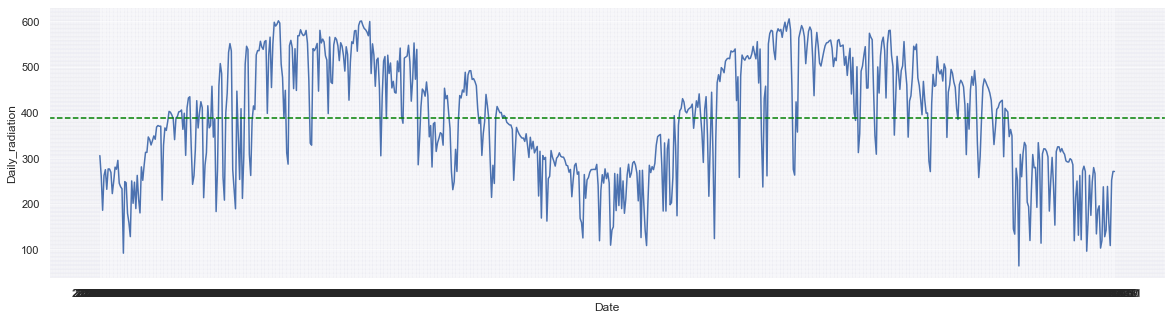

In [7]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend();

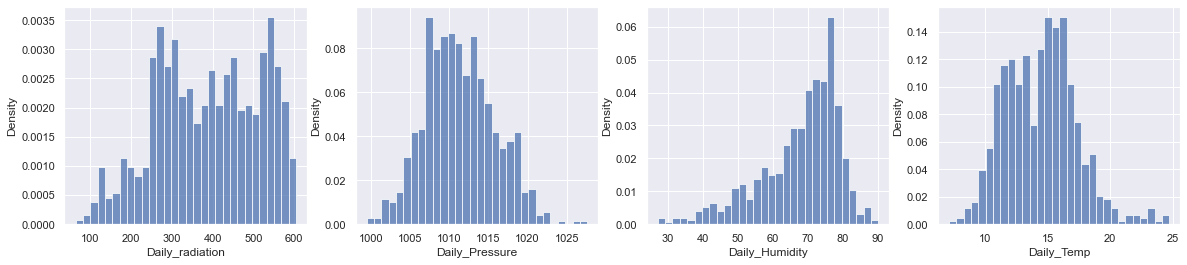

In [8]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

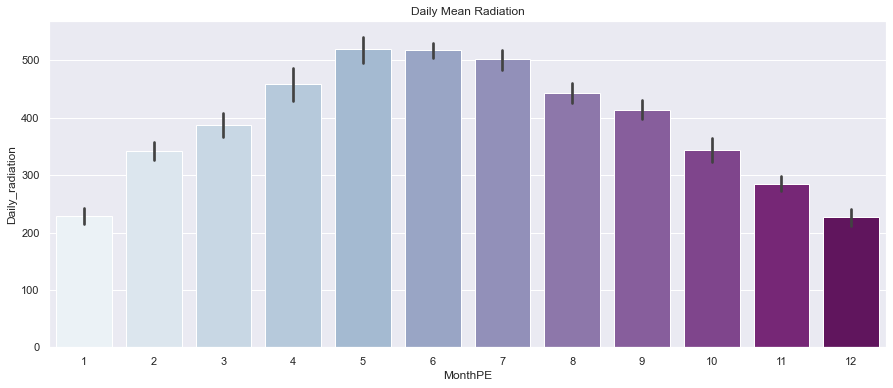

In [9]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

<ipython-input-10-a249a69263a0>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")


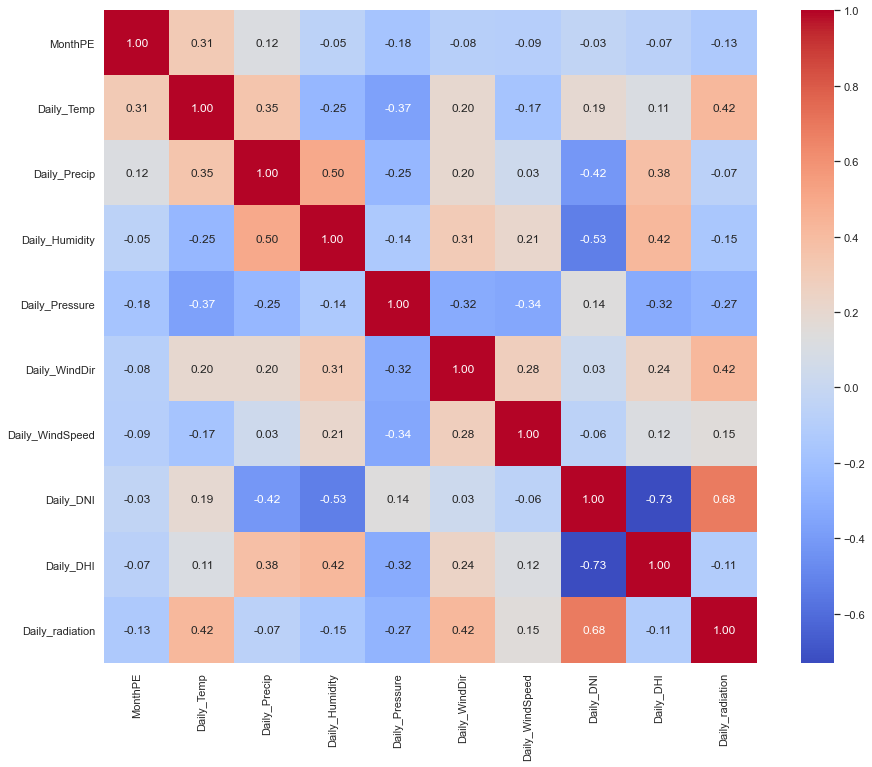

In [10]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

## Optional: Statistical check: stationary or non-stationary
This is needed for time series forcasting, but for this project, we are not trying to foreast daily radiation. This session is for exploratory only.

ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses.

Before going into the ADF test, we must know about the unit root test because the ADF test belongs to the unit root test.

A unit root test tests whether a time series is not stationary and consists of a unit root in time series analysis. The presence of a unit root in time series defines the null hypothesis, and the alternative hypothesis defines time series as stationary. The null hypothesis: the distribution is non-stationary, time-dependent (it has a unit root).
The alternative hypothesis: the distribution is stationary, not time-dependent (can’t be represented by a unit root).

**If the data series is not stationary and it cannot be forecasted using traditional time series models.** We need to transform the data in order to flatten the increasing variance. Most of these transformation involve taking logarithms, first/second-order, or seasonal differencing.

In [11]:
# Adfuller test on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values

def adf_test(X):
    # ADF Test
    result = adfuller(X,autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [12]:
# ADF Test result
adf_test(Xrad)

ADF Statistic: -2.230422
p-value: 0.195390
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary


In [13]:
ts_cleaned_df=cleaned_df.set_index('Date')

<AxesSubplot:title={'center':'data series'}, xlabel='Date'>

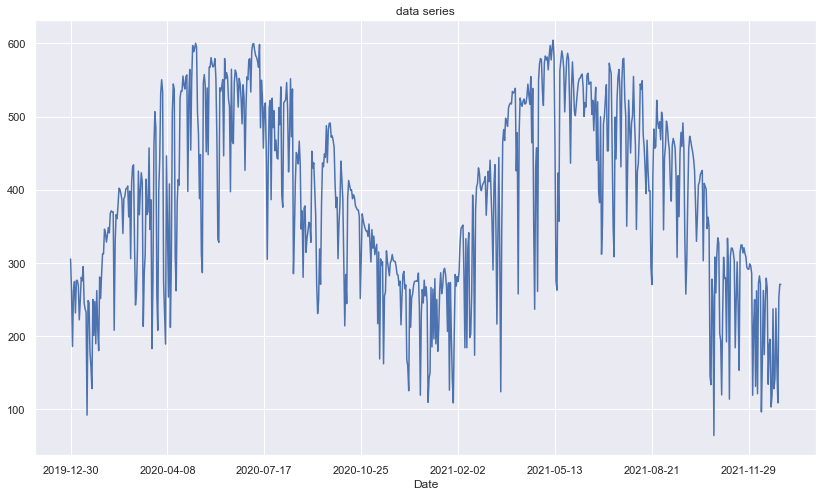

In [14]:
ts_cleaned_df['Daily_radiation'].plot(figsize=(14,8), title='data series')

## Data Preprocessing - Remove Non-Stationary

In [15]:
# 1. Log Transformations
Xrad_log=cleaned_df['Daily_radiation'].apply(np.log).values

In [16]:
# ADF Test
adf_test(Xrad_log)

ADF Statistic: -1.847761
p-value: 0.357020
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary


In [17]:
# 2. Differencing 
# This process involves taking the differences of consecutive observations.
# For simple distributions, taking the first-order difference is enough to make it stationary.

Xrad_df1=cleaned_df["Daily_radiation"].diff(periods=1).dropna().values

# ADF Test
adf_test(Xrad_df1)

ADF Statistic: -8.818585
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Time Series is Stationary


In [18]:
cleaned_df["Daily_radiation_df1"]=cleaned_df["Daily_radiation"].diff(periods=1)

In [19]:
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation,Daily_radiation_df1
0,2019-12-30,12,2019-12-30,10.725,14.4125,72.25,1014.2125,127.0,1.4375,572.125,82.875,305.125,NaN
1,2019-12-31,12,2019-12-31,12.570,14.8700,64.80,1014.7800,163.6,1.6300,487.800,85.500,259.900,-45.225
2,2020-01-01,1,2020-01-01,13.060,24.8000,78.30,1014.7700,256.4,2.7100,146.500,135.300,185.500,-74.400
3,2020-01-02,1,2020-01-02,12.490,13.8400,72.40,1014.3900,324.7,2.6300,461.000,80.900,261.400,75.900
4,2020-01-03,1,2020-01-03,12.400,9.6800,69.90,1016.6500,97.9,2.3900,537.700,76.900,274.400,13.000


<AxesSubplot:title={'center':'data series'}, xlabel='Date'>

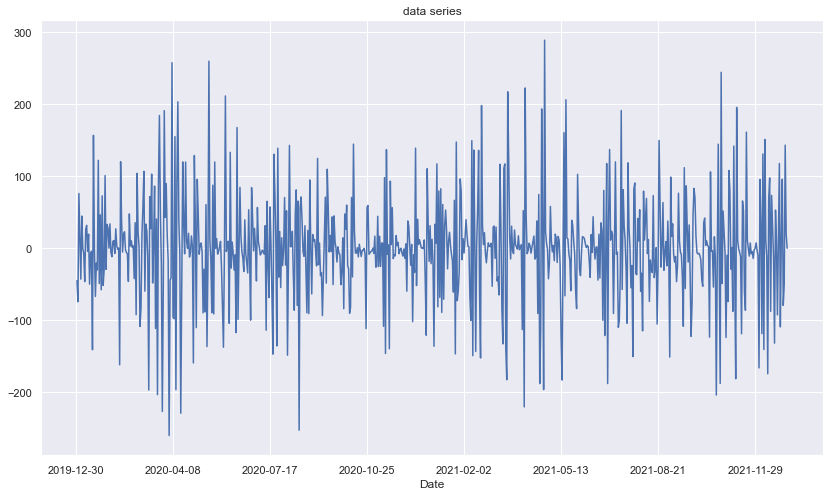

In [20]:
cleaned_df.set_index('Date')['Daily_radiation_df1'].plot(figsize=(14,8), title='data series')

In [21]:
# add differencing back to the final cleaned df

# cleaned_df.to_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/cleaned_solar_irradiation_df1.csv')